
#  Importing libraries





In [168]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Reading Data

In [226]:
df = pd.read_csv('Cars.csv')

In [170]:
df.head()

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza


 **- This Dataset is for used cars in Egypt 
 it contains features that we will use to predict the car price, lets start    explor our data and prepar it for model** 

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14741 non-null  int64  
 1   Brand         14741 non-null  object 
 2   Model         14741 non-null  object 
 3   Body          14741 non-null  object 
 4   Color         14741 non-null  object 
 5   Year          14741 non-null  int64  
 6   Fuel          14741 non-null  object 
 7   Kilometers    14741 non-null  object 
 8   Engine        14741 non-null  object 
 9   Transmission  14741 non-null  object 
 10  Price         14741 non-null  float64
 11  Gov           14741 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


# Data Cleaning

**- we shoud drop (unnamed: 0) column**



In [172]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [173]:
df.describe()

,Year,Price
count,14741.000000,14741.000000
mean,2005.456821,116.584987
std,12.655566,82.192718
min,1970.000000,3.000000
25%,1998.000000,43.700000
50%,2010.000000,110.000000
75%,2015.000000,161.000000
max,2022.000000,471.500000


- model year from 1970 to 2022
- 50% of the cars is model 2010


**- check duplicated values**

In [174]:
df.duplicated().sum()

1

In [175]:
df=df.drop_duplicates()

**- check null values**

In [176]:
df.isnull().sum()

Brand           0
Model           0
Body            0
Color           0
Year            0
Fuel            0
Kilometers      0
Engine          0
Transmission    0
Price           0
Gov             0
dtype: int64

In [177]:
pd.DataFrame({'': df.columns , 'unique values':  df.nunique().values})


,,unique values
0,Brand,3
1,Model,18
2,Body,3
3,Color,14
4,Year,53
5,Fuel,2
6,Kilometers,16
7,Engine,3
8,Transmission,2
9,Price,631


In [178]:
df.Model.value_counts()

128        2424
Verna      1903
Elantra    1529
Lanos      1342
Accent     1272
Optra      1252
Shahin     1142
Aveo        994
131         572
Cruze       428
Uno         350
Avante      282
Tipo        274
Punto       270
Matrix      268
Tucson      182
I10         166
Excel        90
Name: Model, dtype: int64

In [179]:
df.head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza


In [180]:
df['Fuel'].describe()


count       14740
unique          2
top       Benzine
freq        14199
Name: Fuel, dtype: object

**- The Benzine Is The Most uesd Fuel**

In [181]:
fig = px.box(df, x="Fuel", y="Price")
fig.show()

In [182]:
df.loc[df['Price'] >= 470]


,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
14460,Fiat,Tipo,Sedan,Silver,2021,Benzine,10000 to 19999,1600 CC,Automatic,471.5,Damietta


In [183]:
df['Price'] = df['Price']*1000 # We have mulitpluy The price To make it more reailty

Hyundai      5692
Fiat         5032
Chevrolet    4016
Name: Brand, dtype: int64


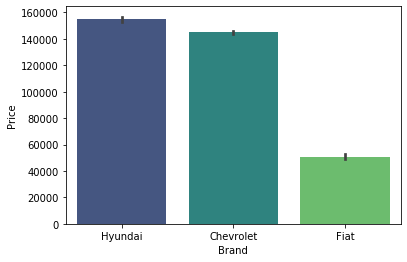

In [184]:
print(df.Brand.value_counts())
sns.barplot(x = df["Brand"], y = df["Price"] , palette='viridis')

1600 CC           6762
1400 - 1500 CC    4356
1000 - 1300 CC    3622
Name: Engine, dtype: int64


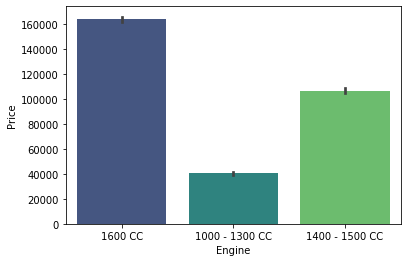

In [185]:
print(df.Engine.value_counts())
sns.barplot(x = df["Engine"], y = df["Price"] , palette='viridis')

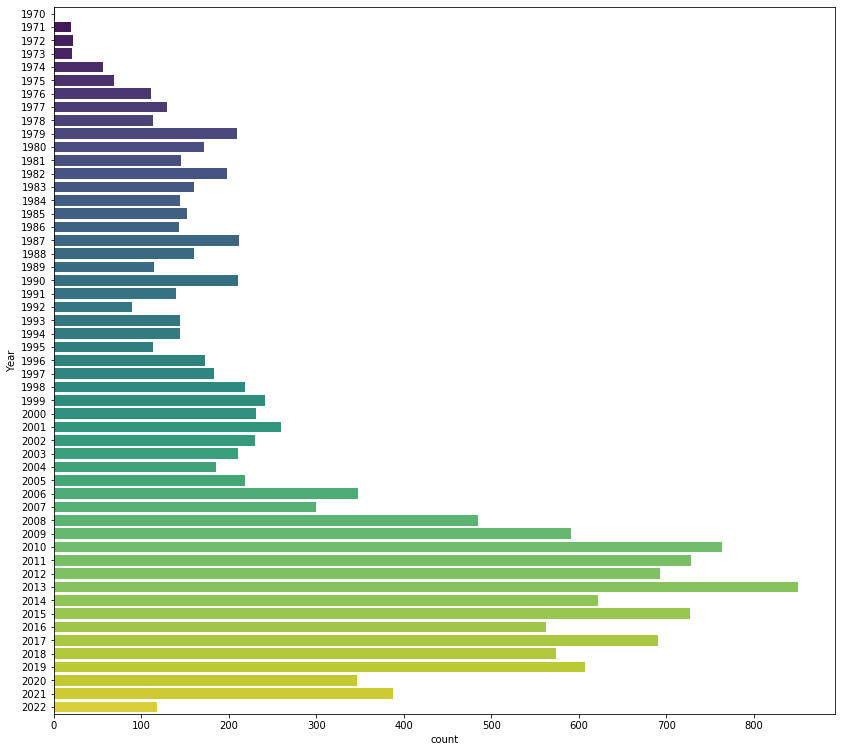

In [187]:
plt.figure(figsize=(14,13))
ax = sns.countplot(y = df["Year"] , palette='viridis');

In [188]:
df.groupby('Brand').describe()['Price'].sort_values('max')

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Hyundai,5692.0,154843.130710,74376.342003,3000.0,100000.0,145000.0,185600.0,408200.0
Chevrolet,4016.0,144822.709163,47179.781929,50000.0,112000.0,135700.0,166800.0,460000.0
Fiat,5032.0,50791.971383,71658.904983,7000.0,22000.0,30000.0,46000.0,471500.0


In [189]:
df.groupby('Model').describe()['Price'].sort_values('max')

,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
128,2424.0,22582.343234,6563.840097,7000.0,17200.0,22000.0,27000.0,42500.0
131,572.0,29055.244755,5928.244937,15000.0,25000.0,28800.0,32400.0,44900.0
Uno,350.0,46078.285714,10484.811633,23000.0,38125.0,45000.0,52000.0,74800.0
Shahin,1142.0,47639.054291,10525.583297,22000.0,40000.0,46000.0,55000.0,78200.0
Punto,270.0,81478.888889,25484.231561,30000.0,63200.0,80250.0,97800.0,166800.0
Excel,90.0,51607.777778,20992.996305,23000.0,45000.0,51150.0,55200.0,185600.0
Lanos,1342.0,112784.202683,26766.176541,50000.0,95000.0,110000.0,130000.0,241500.0
Matrix,268.0,165593.656716,23786.109881,110000.0,149875.0,163850.0,179100.0,253000.0
Aveo,994.0,141558.953722,37755.576145,61000.0,115000.0,135000.0,161000.0,270200.0


In [190]:
bar_data = df.groupby('Model')['Price'].mean().reset_index().sort_values('Price', ascending = True)
fig_bar = px.bar(bar_data, x= 'Price', y= 'Model') 
fig_bar.show()

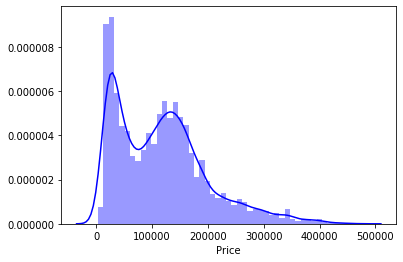

In [191]:
sns.distplot(df['Price'],color='b')

* most of car price is less than 200000 le

In [192]:
df.describe()

,Year,Price
count,14740.000000,14740.000000
mean,2005.458277,116591.607870
std,12.654761,82191.575418
min,1970.000000,3000.000000
25%,1998.000000,43700.000000
50%,2010.000000,110000.000000
75%,2015.000000,161000.000000
max,2022.000000,471500.000000


In [193]:
current_year = datetime.today().year

In [194]:
df['Age'] = current_year - df['Year']

In [195]:
df.Kilometers.nunique()

16

**now we want to do same transforms on Kilometer , engine columns**

In [196]:
kilometer_map = {'0 to 9999': 1, '10000 to 19999': 2, '100000 to 119999': 3, '20000 to 29999': 4, '30000 to 39999': 5,
                 '40000 to 49999': 6, '50000 to 59999': 7, '60000 to 69999': 8, '70000 to 79999': 9,  '80000 to 89999': 10, 
                   '90000 to 99999': 11,  '100000 to 119999': 12,  '120000 to 139999': 13,  '140000 to 159999': 14,
                   '160000 to 179999': 15,  '180000 to 199999': 16, 'More than 200000': 17
                 }

In [197]:
df.Kilometers = df.Kilometers.map(kilometer_map)

In [198]:
def engine_size(Engine):
    if Engine == '1600 CC':
        return 1
    elif Engine == '1400 - 1500 CC':
        return 2
    elif Engine == '1000 - 1300 CC':
        return 3

In [199]:
df.Engine = df.Engine.apply(engine_size)
df.head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov,Age
0,Hyundai,Accent,Sedan,Black,2007,Benzine,14,1,Automatic,140000.0,Giza,16
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,16,3,Manual,78000.0,Qena,18
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,14,2,Manual,70000.0,Giza,24
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,14,1,Automatic,150000.0,Cairo,14
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,2,3,Manual,75000.0,Giza,23


In [200]:
df.drop(columns= ['Year'], inplace= True)
df.to_csv('cleand_data.csv')

In [201]:
df.corr()

,Kilometers,Engine,Price,Age
Kilometers,1.000000,0.191465,-0.187872,0.206548
Engine,0.191465,1.000000,-0.605254,0.583320
Price,-0.187872,-0.605254,1.000000,-0.774264
Age,0.206548,0.583320,-0.774264,1.000000


## **here we will start to prepar the  data for the model**

In [202]:
cat_cols = list(df.select_dtypes(include= 'O').columns) 
cat_cols 

['Brand', 'Model', 'Body', 'Color', 'Fuel', 'Transmission', 'Gov']

In [203]:
num_cols = list(df.select_dtypes(include= 'number').columns) 
num_cols.remove('Price')  
num_cols

['Kilometers', 'Engine', 'Age']

In [204]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

## transformer we use the OneHotEncoder categorical & StanderdScaler For Numerical

In [205]:
def preprocess(X_train, cat_cols, num_cols):

    sc = StandardScaler() 
    ohe = OneHotEncoder(sparse= False, drop= 'first') 
    transformer = make_column_transformer((ohe,cat_cols),(sc,num_cols),remainder= 'passthrough',verbose_feature_names_out=False) 
    transformer.fit(X_train[cat_cols+num_cols]) 
    return transformer

In [206]:
X = df.drop('Price', axis= 1)
y = df.Price

## Data Spliting

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size= 0.2, random_state= 10)
print('X_train Size: ', X_train.shape)
print('y_train Size: ', y_train.shape)
print('X_test Size: ', X_test.shape)
print('y_test Size: ', y_test.shape)

X_train Size:  (11792, 10)
y_train Size:  (11792,)
X_test Size:  (2948, 10)
y_test Size:  (2948,)


In [208]:
X_train.head()

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Gov,Age
1582,Hyundai,Elantra,Sedan,Burgundy,Benzine,1,1,Automatic,Sharqia,1
143,Hyundai,Accent,Sedan,Blue- Navy Blue,Benzine,15,1,Automatic,Fayoum,11
1616,Hyundai,Elantra,Sedan,Other Color,Benzine,13,1,Automatic,Gharbia,10
9269,Chevrolet,Optra,Sedan,Silver,Benzine,15,1,Automatic,Alexandria,7
814,Hyundai,I10,Hatchback,Silver,Benzine,12,3,Manual,Ismailia,11


In [209]:
test_smpl = pd.DataFrame(X_test.iloc[50]).T
test_smpl

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Gov,Age
13102,Fiat,128,Sedan,Beige,Benzine,16,3,Manual,Dakahlia,33


In [210]:
test_smpl_y = y_test.iloc[50]
print(test_smpl_y)
print(test_smpl_y.dtype)

31100.0
float64


In [211]:
X_test.iloc[10]

Brand             Hyundai
Model               Verna
Body                Sedan
Color                Gray
Fuel              Benzine
Kilometers              1
Engine                  1
Transmission    Automatic
Gov                  Giza
Age                     6
Name: 2198, dtype: object

In [212]:
test_sample = pd.DataFrame(X_test.iloc[10]).T
test_sample

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Gov,Age
2198,Hyundai,Verna,Sedan,Gray,Benzine,1,1,Automatic,Giza,6


In [213]:
y_test.iloc[10]

170000.0

In [214]:
test_sample_y = pd.DataFrame({'Price': y_test.iloc[10]}, index= [10]) 
test_sample_y

,Price
10,170000.0


In [215]:
transformer = preprocess(X_train, cat_cols, num_cols) # save the transformer fitted from X_train 
print(transformer)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Brand', 'Model', 'Body', 'Color', 'Fuel',
                                  'Transmission', 'Gov']),
                                ('standardscaler', StandardScaler(),
                                 ['Kilometers', 'Engine', 'Age'])],
                  verbose_feature_names_out=False)


In [216]:
X_train = transformer.transform(X_train[cat_cols+num_cols]) # Apply transformation to training data
X_test = transformer.transform(X_test[cat_cols+num_cols]) # Apply transformation to test data

In [217]:
test_sample = transformer.transform(test_sample[cat_cols+num_cols]) 
test_sample

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -1.71282855, -0.96849661, -0.90599561]])

In [218]:
print('X_train Size: ', X_train.shape)
print('y_train Size: ', y_train.shape)
print('X_test Size: ', X_test.shape)
print('y_test Size: ', y_test.shape)

X_train Size:  (11792, 64)
y_train Size:  (11792,)
X_test Size:  (2948, 64)
y_test Size:  (2948,)


#**Models & Validation**

In [227]:
from sklearn.model_selection import KFold, cross_val_score 

from sklearn.linear_model import LinearRegression 
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import r2_score

In [228]:
k_folds = KFold(n_splits = 8)

In [229]:
linear_regression = LinearRegression()
random_forest = RandomForestRegressor()
knn = KNeighborsRegressor()
decision_tree = DecisionTreeRegressor()
xgboost = XGBRegressor()
models = {
          'LinearRegression': linear_regression,
          'RandomForestRegressor': random_forest,
          'knn': knn,
          'DecisionTreeRegressor': decision_tree,
          'XGBRegressor': xgboost
          }

In [230]:
def models_compar(X_train, y_train, models, k_folds):

    scores_avg_cv = []
    scores_cv = {}
    train_acc = []
    test_acc = []
    r2 = []
    for model_name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv = k_folds)
        scores_cv[model_name] = scores
        scores_avg_cv.append(scores.mean())
        model.fit(X_train,y_train)
        train_acc.append(model.score(X_train, y_train))
        test_acc.append(model.score(X_test, y_test))
        y_pred = model.predict(X_test)
        r2.append(r2_score(y_test,y_pred))

    scores_cv_df = pd.DataFrame(scores_cv)  
    models_df = pd.DataFrame(data= [scores_avg_cv,train_acc,test_acc,r2], index= ['scores_avg_cv','train_acc','test_acc','r2'], columns= models.keys())

    return  scores_cv_df, models_df

In [231]:
scores_cv_df, models_df = models_compar(X_train, y_train, models, k_folds) 


In [232]:
scores_cv_df


,LinearRegression,RandomForestRegressor,knn,DecisionTreeRegressor,XGBRegressor
0,0.853507,0.924911,0.871159,0.880488,0.925324
1,0.827858,0.896531,0.851349,0.855935,0.907592
2,0.859609,0.927579,0.885391,0.898509,0.937089
3,0.841232,0.903069,0.857812,0.869770,0.911560
4,0.862225,0.929644,0.886151,0.876576,0.945539
5,0.844365,0.912082,0.886337,0.882219,0.929842
6,0.856538,0.923055,0.882270,0.887462,0.938552
7,0.848408,0.912794,0.862940,0.860910,0.920732


In [233]:
models_df

,LinearRegression,RandomForestRegressor,knn,DecisionTreeRegressor,XGBRegressor
scores_avg_cv,0.849218,0.916208,0.872926,0.876484,0.927029
train_acc,0.851277,0.979801,0.922182,0.987785,0.961969
test_acc,0.839978,0.912680,0.861666,0.879498,0.915276
r2,0.839978,0.912680,0.861666,0.879498,0.915276


## model Tunning

In [234]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [7,8,9,10,11,12]}

grid = GridSearchCV(xgboost, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_p

In [235]:
print(grid.best_score_)
print(grid.best_params_)

0.9224877452273116
{'max_depth': 8, 'n_estimators': 50}


In [236]:
xgboost_best = XGBRegressor(n_estimators= 50 , max_depth= 8 , random_state= 10)

In [237]:
xgboost_best.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=10,
             reg_alpha=0, reg_lambda=1, ...)

In [238]:
print('Training Accuracy: ', xgboost_best.score(X_train, y_train))
print('Test Accuracy: ', xgboost_best.score(X_test, y_test))

Training Accuracy:  0.9665179471130401
Test Accuracy:  0.9127957081379985


**Now, we have a model with about 91 % accuracy.**

In [239]:
import pickle

In [240]:
# Saving Transformar & model
pickle.dump(transformer, open('transf.pkl', 'wb'))


In [241]:
pickle.dump(xgboost_best, open('XGB.pkl', 'wb'))

In [242]:
transformar = pickle.load(open('transf.pkl', 'rb'))
model = pickle.load(open('XGB.pkl', 'rb'))

In [243]:
test_smpl = transformar.transform(test_smpl[cat_cols+num_cols])


In [244]:
print('Prediction Test: ', model.predict(test_smpl)[0])
print('Actual Value: ', test_smpl_y)

Prediction Test:  27044.65
Actual Value:  31100.0


# Project Done.